In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

import json
import torch
from torchvision import models, transforms
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.explainers.vision.specific.gradcam.pytorch.gradcam import GradCAM

from utils import train_epoch, evaluate


In [2]:
PATH = '../original_data/test/CNV/CNV-53018-1.jpeg'

In [74]:
img = Image(PilImage.open(PATH).convert('RGB'))
# Load the class names



# A ResNet Model
# device = torch.device("cuda" if torch.cuda.is_available else "cpu")
# model = torch.load(f'./models/cnn-80.pth')
# model = torch.load(f'./models/resnet50-80.pth')


# model = models.resnet50(weights="ResNet50_Weights.DEFAULT")
# model = models.resnet50()
# model.load_state_dict()
# model = torch.load(f'./models/resnet50-80.pth')
# model = torch.load(f'./models/mobilenetv2-80.pth')
# model.eval()

# The preprocessing model

transform = transforms.Compose([
            transforms.Resize(((150, 150))),
            transforms.ToTensor(),
        ])

# transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

preprocess = lambda ims: torch.stack([transform(im.to_pil()) for im in ims])


explainer = GradCAM(
    model=model,
    target_layer=model.layer4[-1],
    # target_layer=model.features[-1],
    preprocess_function=preprocess
)

# print(img.shape)
# Explain the top label

# explanations = explainer.explain(img)
# print(explanations)
# explanations.ipython_plot(index=0, class_names=idx2label)


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [75]:
# explanations.ipython_plot(index=0, class_names=idx2label)
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# plt.imshow(explanations)
# dir(explanations)
with open('../temp_imgnet.json', 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

# np.asarray(explanations)


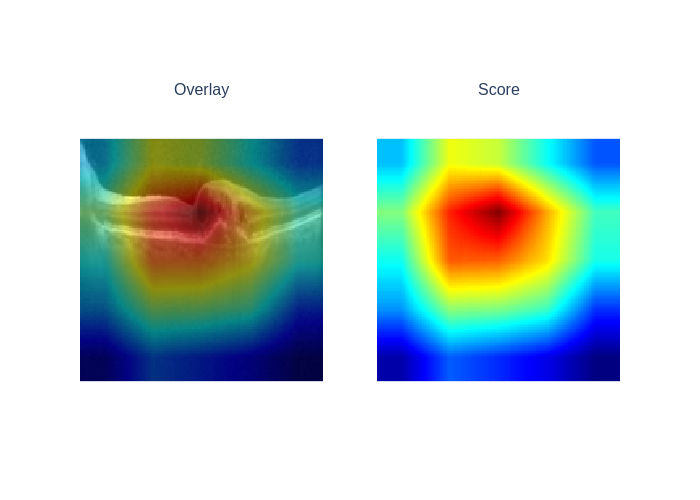

omnixai.explanations.image.pixel_importance.PixelImportance

In [77]:
explanations.ipython_plot(index=0, class_names=idx2label)
# dir(explanations)
# explanations.to_json()
type(explanations)
# explanations.plotly_plot()

In [17]:
from torchsummary import summary

In [68]:
model = torch.load(f'./models/mobilenetv2-80.pth')
# model = torch.load(f'./models/resnet50-80.pth')
for name, layer in model.named_modules():
  print(name)
# model.eval()



features
features.0
features.0.0
features.0.1
features.0.2
features.1
features.1.conv
features.1.conv.0
features.1.conv.0.0
features.1.conv.0.1
features.1.conv.0.2
features.1.conv.1
features.1.conv.2
features.2
features.2.conv
features.2.conv.0
features.2.conv.0.0
features.2.conv.0.1
features.2.conv.0.2
features.2.conv.1
features.2.conv.1.0
features.2.conv.1.1
features.2.conv.1.2
features.2.conv.2
features.2.conv.3
features.3
features.3.conv
features.3.conv.0
features.3.conv.0.0
features.3.conv.0.1
features.3.conv.0.2
features.3.conv.1
features.3.conv.1.0
features.3.conv.1.1
features.3.conv.1.2
features.3.conv.2
features.3.conv.3
features.4
features.4.conv
features.4.conv.0
features.4.conv.0.0
features.4.conv.0.1
features.4.conv.0.2
features.4.conv.1
features.4.conv.1.0
features.4.conv.1.1
features.4.conv.1.2
features.4.conv.2
features.4.conv.3
features.5
features.5.conv
features.5.conv.0
features.5.conv.0.0
features.5.conv.0.1
features.5.conv.0.2
features.5.conv.1
features.5.conv.1.0

In [46]:

# model = models.resnet50()
# # model.load_state_dict(torch.load(f'./models/resnet50-80.pth'))
# # summary(model.cuda(), (3, 150, 150))
# # print(type(model))
# # type(model)

In [48]:

# model = models.resnet50(weights="ResNet50_Weights.DEFAULT")
model = torch.load(f'./models/resnet50-80.pth')
model.eval()
# summary(model.cuda(), (3, 150, 150))
# print(type(model))
# type(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [79]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50


In [86]:
img.shape

(1, 496, 768, 3)

In [83]:

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
input_tensor = img# Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers)

In [85]:


# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

targets = [ClassifierOutputTarget(281)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)


TypeError: conv2d() received an invalid combination of arguments - got (Image, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)


In [ ]:

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)